## Cha4 Numpy:数据和矢量计算

NumPy可以高效处理大数组的数据
+ NumPy是在一个连续的内存块中存储数据
+ NumPy的C语言编写的算法库可以操作内存，二不必进行类型检查或其他前期工作
+ NumPy可以在这个数组上执行复杂的计算，二不需要使用Python的for循环

In [1]:
import numpy as np

myArr = np.arange(1000000)
myList = list(range(1000000))

%time for _ in range(10): myArr2 = myArr * 2

Wall time: 15.7 ms


In [2]:
%time for _ in range(10): myList2 = myList * 2

Wall time: 146 ms


Numpy的算法要比Python块10到100倍（甚至更快），并且使用的内存更少

### 4.1 NumPy的ndarray：一种多维数组对象
+ NumPy最重要的是其N维数组对象，是一个快速而灵活的大数据集容器
+ 可以利用这种数组对整块数据执行一些数据运算

In [6]:
import numpy as np

# Generate some random data
data = np.random.randn(2,3)

data

array([[ 0.44991179, -0.37722052,  0.9242894 ],
       [-0.08375948, -0.43497448, -1.26417235]])

In [10]:
# 然后进行数学运算
# 可以进行整块数据的运算
data * 10

array([[  4.49911788,  -3.77220522,   9.24289398],
       [ -0.83759477,  -4.34974482, -12.64172352]])

In [8]:
data + data 

array([[ 0.89982358, -0.75444104,  1.8485788 ],
       [-0.16751895, -0.86994896, -2.5283447 ]])

+ ndarray是一个通用的**同构**数据多维容器，也即，其中的所有元素都必须是相同类型的。
+ 每个数组都是一个shape(一个表示各维度大小的元组)和一个dtype(一个用于说明数组数据类型的对象)

In [11]:
data.shape

(2, 3)

In [12]:
data.dtype

dtype('float64')

#### 创建ndarray
+ np.array()
+ np.arange(k)
+ np.zeros()
+ np.ones()
+ np.full()
+ np.empty()
+ np.eye()

In [13]:
# 使用array函数创建
data1 = [6, 7.5, 8, 0, 1]

arr1 = np.array(data1)

arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [14]:
# 因为 ndarray 是一个同构的数据多维容器，所以会进行强制类型转换
arr1.dtype

dtype('float64')

In [15]:
# 嵌套序列（比如由一组等长列表组成的列表）将会被转换为一个多维数组

data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]

arr2 = np.array(data2)

arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [16]:
arr2.shape

(2, 4)

In [19]:
# 矩阵的秩
arr2.ndim

2

In [22]:
# 使用zeros 和ones可以创建指定长度或形状的全0或全1数组
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [24]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

**注意：很多情况下，np.empty会返回一些未初始化的垃圾值**

In [25]:
np.empty((4,4))

array([[4.67296746e-307, 1.69121096e-306, 8.90071135e-308,
        8.34441742e-308],
       [1.78022342e-306, 6.23058028e-307, 9.79107872e-307,
        6.89807188e-307],
       [7.56594375e-307, 6.23060065e-307, 1.78021527e-306,
        8.34454050e-308],
       [1.11261027e-306, 1.15706896e-306, 1.33512173e-306,
        1.33504432e-306]])

arange 是 Python 内置函数range的数组版

In [18]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

由于NumPy关注的是数值计算，因此，如果没有特别指定，数据类型基本都是float64

In [27]:
np.full(10,3)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [29]:
# 创建一个正方的 N*N单元矩阵（对角线未1，其余为0）
np.eye(2)

array([[1., 0.],
       [0., 1.]])

#### ndarray 的数据类型
dtype(数据类型) 是一个特殊的对象，含有ndarray将一块内存解释为特定数据类型所需的信息。
+ dtype是NumPy灵活交互其他系统的源泉之一，
+ 多数情况，它们直接映射到相应的机器表示
+ 命名方式
    - 一个类型名（如float或int），后面跟一个用于表示个元素位长的数字
    - 标准双精度浮点值（即float）需要占用8字节（即64位）

In [30]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr1.dtype

dtype('float64')

In [32]:
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr2.dtype

dtype('int32')

+ 可以通过ndarray 的**astype**方法明确地将一个数组从一个dtype转换为另一个dtype
+ astype 总会创建一个新的数组，，即使新的dtype和就得dtype相同

In [33]:
arr = np.array([1,2,3,4])
arr.dtype

dtype('int32')

In [35]:
floatArr = arr.astype(np.float64)
floatArr.dtype

dtype('float64')

In [37]:
# 浮点数转换为整数，小数部分会被截取删除
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10])

In [38]:
# 字符串数组表示的全是数字，也可以用astype将其转换为数值形式
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

#### NumPy数组的运算
大小相等的数组之间的任何算术运算都会将运算应用到元素级

In [39]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [40]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [41]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

数组与标量的算术运算会将标量值传播到各个元素

In [42]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [43]:
arr ** 2

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

大小相同的数组之间的比较会生成布尔值数组

In [44]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2 > arr1

array([[False,  True, False],
       [ True, False,  True]])

#### 基本的索引和切片

In [45]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
arr[5]

5

In [47]:
arr[5:8]

array([5, 6, 7])

In [48]:
arr[5:8] = 12

In [49]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

+ 当你将一个标量值赋值给一个切片时（如arr[5:8]=12），该值会自动传播（也就说后面将会讲到的“广播”）到整个选区
+ 跟列表最重要的区别在于，数组切片是原始数组的视图，这意味着数据不会被复制，视图上的任何修改都会直接反映到源数组上。
    - 原因是：NumPy的设计目的是处理大数据，所以如果将数据复制来复制去的话就会产生性能和内存问题

In [50]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [52]:
# 对 arr_slice 的修改也体现子原始数组 arr 中
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

**因此，想要得到ndarray的一份副本而非视图，就需要明确地进行复制操作，如arr[5:8].copy()**

In [53]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

arr2d[2]

array([7, 8, 9])

In [54]:
arr2d[0][2]

3

In [55]:
# 与上面等价
arr2d[0,2]

3

In [56]:
arr3d = np.array([
    [[1, 2, 3], [4, 5, 6]], 
    [[7, 8, 9], [10, 11, 12]]
])

arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [57]:
arr3d.shape

(2, 2, 3)

In [58]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [59]:
oldVal = arr3d[0].copy()

In [60]:
arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [61]:
oldVal

array([[1, 2, 3],
       [4, 5, 6]])

#### 切片索引

一维数组

In [64]:
arr = np.array([ 0, 1, 2, 3, 4, 64, 64, 64, 8, 9])
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [65]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

二维数组

In [66]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [67]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [68]:
arr2d[:2,:1]

array([[1],
       [4]])

In [69]:
# 通过将整数索引和切片混合，可以得到低维度的切片
# 第二行的前两列
arr2d[1,:2]

array([4, 5])

In [71]:
# 第三列的前两行
arr2d[:2,2]

array([3, 6])

In [73]:
arr2d[:,:1]

array([[1],
       [4],
       [7]])

#### 布尔型索引

In [77]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will','Joe', 'Joe'])

data = np.random.randn(7,4)

In [78]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [79]:
data

array([[-0.4768354 , -1.06882837,  0.04047791,  0.97232557],
       [-0.46149604,  0.04874112,  0.70677307, -1.57848043],
       [ 0.74182739, -1.34009337, -0.29171718, -0.26343057],
       [-0.2565601 , -0.63046337, -0.16279852, -0.37845668],
       [ 1.1931111 , -0.95444366,  0.14593703,  0.16884888],
       [ 0.62428794,  0.57811853,  1.28685012,  1.61714349],
       [ 0.4514574 ,  0.76375241,  1.65843892, -1.58004321]])

In [80]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [81]:
# 布尔型数组的长度必须跟被索引的轴长度一致
data[names == 'Bob']

array([[-0.4768354 , -1.06882837,  0.04047791,  0.97232557],
       [-0.2565601 , -0.63046337, -0.16279852, -0.37845668]])

In [82]:
data[names == 'Bob',2:]

array([[ 0.04047791,  0.97232557],
       [-0.16279852, -0.37845668]])

#### 花式索引
是指利用整数数组进行索引

In [83]:
arr = np.empty((8, 4))

In [84]:
for i in range(8):
    arr[i] = i

In [85]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [86]:
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [89]:
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

#### 数组装置和轴对换

In [90]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [91]:
arr.T

array([[0., 1., 2., 3., 4., 5., 6., 7.],
       [0., 1., 2., 3., 4., 5., 6., 7.],
       [0., 1., 2., 3., 4., 5., 6., 7.],
       [0., 1., 2., 3., 4., 5., 6., 7.]])

In [93]:
# np.dot 计算矩阵内积
np.dot(arr, arr.T)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.],
       [  0.,   8.,  16.,  24.,  32.,  40.,  48.,  56.],
       [  0.,  12.,  24.,  36.,  48.,  60.,  72.,  84.],
       [  0.,  16.,  32.,  48.,  64.,  80.,  96., 112.],
       [  0.,  20.,  40.,  60.,  80., 100., 120., 140.],
       [  0.,  24.,  48.,  72.,  96., 120., 144., 168.],
       [  0.,  28.,  56.,  84., 112., 140., 168., 196.]])

### 4.2 通用函数：快速的元素级数组函数

In [94]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [95]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [96]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [97]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

### 4.3 利用数组进行数据处理

In [105]:
points = np.arange(5)

In [106]:
xs, ys = np.meshgrid(points,points)

In [107]:
ys

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [108]:
xs

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

#### 数学和统计方法
可以通过数组上的一组数学函数对整个数组或某个轴向的数据进行统计计算。

In [3]:
import numpy as np
arr = np.random.randn(5,4)

arr

array([[-0.58628674, -0.33129723, -0.189485  , -2.14198146],
       [-0.13694634, -1.64838764,  1.46800512, -0.2669325 ],
       [ 1.0238649 ,  1.9032815 , -0.78020377,  1.85796939],
       [ 0.74185287, -2.58053434,  0.41197384, -0.57300122],
       [-1.65659263,  1.32582261, -0.24692274, -1.11221992]])

In [4]:
# mean 求算术平均数
arr.mean()

0.11781855111163349

In [5]:
np.mean(arr)

0.11781855111163349

In [6]:
arr.sum()

2.3563710222326697

In [7]:
# mean和sum这类的函数可以接受一个axis选项参数，用于计算该轴向上的统计值，
#最终结果是一个少一维的数组
# 地址：https://zhuanlan.zhihu.com/p/30960190
arr.mean(axis = 1)

array([-0.41401515,  0.37811936,  0.68096171,  0.07513879, -0.13111196])

In [8]:
arr.mean(axis=0)

array([-0.21373687,  0.03155887, -0.05140523,  0.70485743])

In [10]:
arr1 = np.arange(4).reshape(2,2)
arr1

array([[0, 1],
       [2, 3]])

In [15]:
np.sum(arr1,axis=0)

array([2, 4])

In [16]:
np.sum(arr1,axis=1)

array([1, 5])

#### 用于布尔型数组的方法

In [17]:
# 布尔值会被强制转换为1（True）和0（False）
arr = np.random.randn(100)
(arr > 0).sum()

52

In [19]:
# any 方法用于测试数组中是否存在一个或多个True
# all 用于检查数组中所有值是否都是True
bools = np.array([False,False,True,True])
bools.any()

True

In [20]:
bools.all()

False

#### 排序

In [22]:
# sort方法排序
arr = np.random.randn(6)
arr

array([ 1.05403721,  0.97577081, -2.01169337, -0.56062391,  1.29566045,
        0.85913878])

In [24]:
arr.sort()
arr

array([-2.01169337, -0.56062391,  0.85913878,  0.97577081,  1.05403721,
        1.29566045])

In [4]:
arr = np.random.randn(5,3)
arr

array([[-0.23561832,  1.88891932,  1.44474429],
       [-0.00737171, -0.76601012, -0.69470029],
       [ 1.07846469, -0.17889434, -0.89578877],
       [-0.52654507, -0.10624842, -2.33362015],
       [ 1.66267406,  0.59250305, -0.11538695]])

In [32]:
arr.shape

(5, 3)

In [5]:
arr.sort(0) # 按列排序
arr

array([[-0.52654507, -0.76601012, -2.33362015],
       [-0.23561832, -0.17889434, -0.89578877],
       [-0.00737171, -0.10624842, -0.69470029],
       [ 1.07846469,  0.59250305, -0.11538695],
       [ 1.66267406,  1.88891932,  1.44474429]])

In [7]:
arr.sort(1) # 按行排序
arr

array([[-2.33362015, -0.76601012, -0.52654507],
       [-0.89578877, -0.23561832, -0.17889434],
       [-0.69470029, -0.10624842, -0.00737171],
       [-0.11538695,  0.59250305,  1.07846469],
       [ 1.44474429,  1.66267406,  1.88891932]])

#### 唯一化以及其他的集合逻辑
最常用的：np.unique，用于找出数组中的唯一值并返回已排序的结果

In [9]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will',
'Joe', 'Joe'])

np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [11]:
ints = np.array([3,3,3,2,2,1,1,4,4])
np.unique(ints)

array([1, 2, 3, 4])

In [13]:
# 等价的纯 python 代码
sorted(set(names))

['Bob', 'Joe', 'Will']

np.in1d，用于测试一个数组中的值在另一个数组中的成员资格，返回一个布尔型数组

In [14]:
np.in1d(names,['Bob','Will'])

array([ True, False,  True,  True,  True, False, False])

### 4.5 线性代数
最常用：dot() 内积

In [15]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [16]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [17]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [18]:
# 等价于 np.dot(x,y)
np.dot(x,y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [19]:
x.T.dot(x)

array([[17., 22., 27.],
       [22., 29., 36.],
       [27., 36., 45.]])

### 4.6 伪随机数生成
numpy.random模块对Python内置的random进行了补充，增加了用于高效生成多种概率分布的样本值的函数

In [23]:
# normal - 得到一个标准正态分布的样本

samples = np.random.normal(size=(4,4))
samples

array([[-0.13782489,  0.59402397, -0.82024252,  1.09974601],
       [-1.47852651,  2.18243538,  0.12181237,  0.06205034],
       [-0.23621876,  0.68628837,  1.97066437,  2.15454549],
       [ 1.41001757,  0.16362221, -0.89628806,  0.08836754]])

In [24]:
# numpy.random 比 Python 内置的random快了很多
from random import normalvariate

N = 1000000

%timeit samples = [normalvariate(0,1) for _ in range(N)]

719 ms ± 8.79 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
%timeit np.random.normal(size=N)

27 ms ± 716 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [26]:
ints = np.arange(20)
ints

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [29]:
# 对一个序列就地随机排序
np.random.shuffle(ints)
ints

array([ 6, 17, 19, 14,  0,  5,  3,  7,  2, 13, 11, 16, 10,  1, 15,  9, 12,
       18,  8,  4])

In [32]:
# 产生均匀分布的样本值
np.random.rand(2,3)

array([[0.98261937, 0.01513794, 0.10750193],
       [0.13074717, 0.2039908 , 0.73413566]])

In [34]:
# 从给定的上下限范围内随机选取整数
np.random.randint(0,2,(2,3))

array([[0, 1, 1],
       [0, 0, 1]])

In [36]:
# 产生正态分布（平均值为0，标准差为1）的样本值
np.random.randn(2,3)

array([[-1.14085215, -0.27864115,  0.29563347],
       [ 1.46955772, -0.04645015,  1.10057899]])

### 4.7 随机漫步

In [95]:
# 用内置的random实现
import random
import matplotlib.pyplot as plt

position = 0
walk = [position]
steps = 1000
for i in  range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)

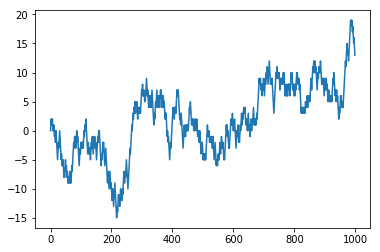

In [96]:
plt.plot(walk[:1000])

In [122]:
nsteps = 1000
draws = np.random.randint(0,2,size=nsteps)
steps = np.where(draws > 0, 1, -1)
# plt.plot(walk[:1000])

In [123]:
# 对所有元素依次做累加
walk = steps.cumsum()

In [124]:
walk.max()

35

In [125]:
walk.min()

-27

In [126]:
(np.abs(walk) >= 10).argmax()

75

In [132]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0,2,size=(nwalks,nsteps))
steps = np.where(draws > 0, 1, -1)
steps


array([[ 1, -1, -1, ..., -1,  1, -1],
       [ 1, -1,  1, ..., -1, -1, -1],
       [ 1,  1, -1, ...,  1,  1,  1],
       ...,
       [ 1, -1, -1, ...,  1, -1,  1],
       [ 1, -1, -1, ...,  1,  1,  1],
       [-1, -1, -1, ..., -1, -1, -1]])

In [136]:
walks = steps.cumsum(1)
walks

array([[  1,   0,  -1, ...,  -4,  -3,  -4],
       [  1,   0,   1, ...,  -8,  -9, -10],
       [  1,   2,   1, ...,  78,  79,  80],
       ...,
       [  1,   0,  -1, ...,  46,  45,  46],
       [  1,   0,  -1, ...,  14,  15,  16],
       [ -1,  -2,  -3, ..., -54, -55, -56]], dtype=int32)

In [137]:
walks.max()

110

In [138]:
walks.min()

-134

In [139]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30

array([ True, False,  True, ...,  True, False,  True])

In [142]:
hits30.sum()

3342